In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling as pdl

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

In [140]:
!pip install pandas_profiling

In [141]:
df = pd.read_csv("train.csv")

In [142]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null float64
Married              611 non-null object
Dependents           614 non-null float64
Education            614 non-null int64
Self_Employed        614 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(7), int64(2), object(4)
memory usage: 62.4+ KB


In [145]:
pro = pdl.ProfileReport(df)

In [146]:
pro

Number of variables,13
Number of observations,614
Total Missing (%),0.9%
Total size in memory,62.4 KiB
Average record size in memory,104.1 B
Numeric,6
Categorical,3
Boolean,3
Date,0
Text (Unique),1
Rejected,0


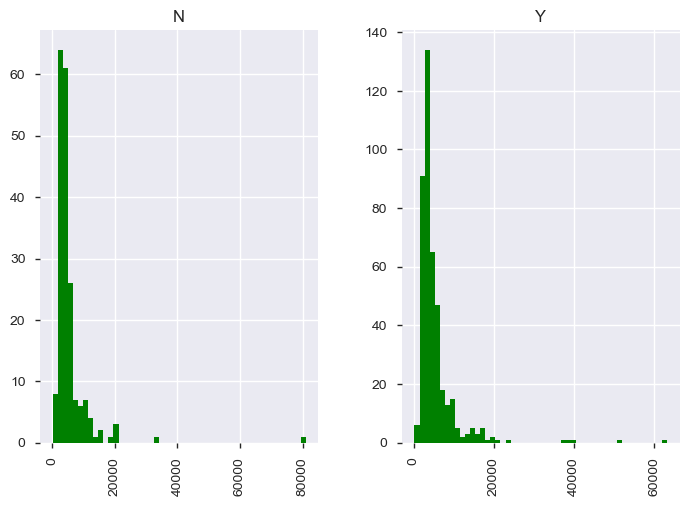

<Figure size 1700x1000 with 0 Axes>

In [147]:
df[["Loan_Status","ApplicantIncome"]].hist(bins=50, by = "Loan_Status", color = "g")
plt.figure(figsize=[17,10])
plt.show()

In [148]:
coapplicants = df["CoapplicantIncome"]

In [149]:
coapplicants = coapplicants.apply(lambda x: 'N' if x == 0 else 'Y')

In [150]:
def nome_da_funcao(x):
    if x==0:
        return 'N'
    else:
        return 'Y'

In [151]:
coapplicants.value_counts()

Y    341
N    273
Name: CoapplicantIncome, dtype: int64

In [152]:
df.drop("Loan_ID", axis = 1, inplace = True)

In [153]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [154]:
pd.get_dummies(coapplicants)

,N,Y
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [155]:
df.columns = ['is_male','is_Married','is_Dependents','is_Graduated','is_Self_Employed',
             'Applicantlncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
             'has_Credit_History','Property_Area','Loan_Status']

In [156]:
x = df.columns.tolist()

In [157]:
x[0] = "is_Male"

In [158]:
df.columns = x

In [159]:
mapper = {'Yes':1,'No':0}
df['is_Married'] = df['is_Married'].map(mapper)

In [160]:
mapper_2 = {'Y':1,'N':0}
df['Loan_Status'] = df['Loan_Status'].map(mapper_2)

In [161]:
df.isnull().sum().sort_values(ascending=False)

has_Credit_History    50
LoanAmount            22
is_Married             3
Loan_Status            0
Property_Area          0
Loan_Amount_Term       0
CoapplicantIncome      0
Applicantlncome        0
is_Self_Employed       0
is_Graduated           0
is_Dependents          0
is_Male                0
dtype: int64

In [162]:
df.head()

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,Applicantlncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [163]:
df.dropna(subset=['is_Married'], inplace=True)

In [164]:
np.round(df['LoanAmount'].fillna(df['LoanAmount'].mean()),2)

0      146.37
1      128.00
2       66.00
3      120.00
4      141.00
5      267.00
6       95.00
7      158.00
8      168.00
9      349.00
10      70.00
11     109.00
12     200.00
13     114.00
14      17.00
15     125.00
16     100.00
17      76.00
18     133.00
19     115.00
20     104.00
21     315.00
22     116.00
23     112.00
24     151.00
25     191.00
26     122.00
27     110.00
28      35.00
29     120.00
        ...  
584    146.00
585    172.00
586    104.00
587     70.00
588     94.00
589    106.00
590     56.00
591    205.00
592    292.00
593    142.00
594    260.00
595    110.00
596    187.00
597     88.00
598    180.00
599    192.00
600    350.00
601    155.00
602    128.00
603    172.00
604    496.00
605    146.37
606    173.00
607    157.00
608    108.00
609     71.00
610     40.00
611    253.00
612    187.00
613    133.00
Name: LoanAmount, Length: 611, dtype: float64

In [165]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [166]:
df['has_Credit_History'].value_counts()

1.0    472
0.0     89
Name: has_Credit_History, dtype: int64

In [167]:
df['has_Credit_History'].fillna(1, inplace =True)

In [168]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [169]:
df = pd.get_dummies(df, columns=['Property_Area'])

In [170]:
df.head()

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,Applicantlncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1


In [171]:
df.corr()

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,Applicantlncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
is_Male,1.000000,0.367926,0.172422,-0.044560,-0.001284,0.061997,0.082028,0.108135,-0.082177,0.010004,0.019381,0.079452,-0.105347,0.031761
is_Married,0.367926,1.000000,0.337748,-0.014223,0.005904,0.051332,0.077770,0.146981,-0.102624,0.009481,0.089280,-0.004520,0.003744,0.000514
is_Dependents,0.172422,0.337748,1.000000,-0.053947,0.055471,0.118901,0.028788,0.163692,-0.103619,-0.038736,0.012593,-0.003147,0.004086,-0.001169
is_Graduated,-0.044560,-0.014223,-0.053947,1.000000,0.011414,0.140590,0.063585,0.166864,0.073701,0.072670,0.084286,-0.075984,0.038022,0.034363
is_Self_Employed,-0.001284,0.005904,0.055471,0.011414,1.000000,0.127550,-0.017019,0.115500,-0.033421,-0.000757,-0.002404,0.020858,0.009885,-0.030407
Applicantlncome,0.061997,0.051332,0.118901,0.140590,0.127550,1.000000,-0.116266,0.566037,-0.044361,-0.018900,-0.005154,0.016269,-0.016002,0.000756
CoapplicantIncome,0.082028,0.077770,0.028788,0.063585,-0.017019,-0.116266,1.000000,0.188151,-0.059135,0.012093,-0.057733,0.003860,-0.025199,0.022269
LoanAmount,0.108135,0.146981,0.163692,0.166864,0.115500,0.566037,0.188151,1.000000,0.036135,-0.001631,-0.036782,0.043538,-0.008376,-0.033530
Loan_Amount_Term,-0.082177,-0.102624,-0.103619,0.073701,-0.033421,-0.044361,-0.059135,0.036135,1.000000,-0.005291,-0.023619,0.035425,0.058878,-0.095081
has_Credit_History,0.010004,0.009481,-0.038736,0.072670,-0.000757,-0.018900,0.012093,-0.001631,-0.005291,1.000000,0.540021,-0.019637,0.034905,-0.017002


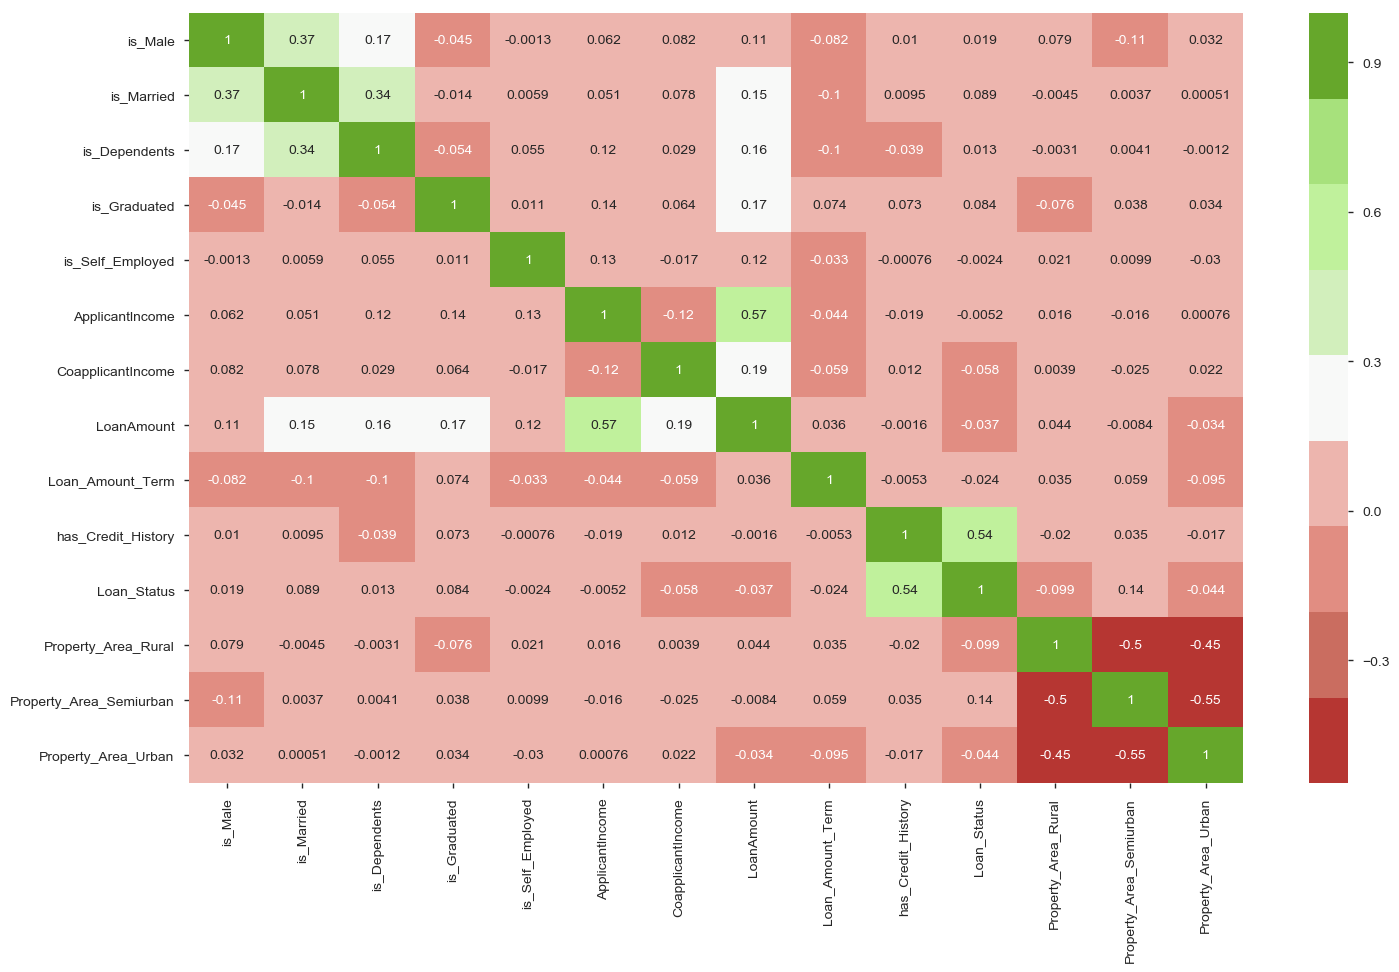

In [172]:
#http://colormind.io/ usei para pegar os codigos das paletas
flatui = ['#B63632','#CA6D60','#e18d82','#edb5ae','#F8F9F8','#d2efbc','#c0f19c','#A7E17C','#66A72B']
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), cmap=my_cmap, annot=True)
plt.show()

In [173]:
pro = pdl.ProfileReport(df)

In [174]:
df['TotalIncome'] = df['Applicantlncome'] + df['CoapplicantIncome']

In [175]:
df.head()

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,Applicantlncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1,5849.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,6091.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1,3000.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,4941.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,6000.0


In [176]:
#deteccao de anomalia
df['Applicantlncome'] = np.log(df['Applicantlncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])


df.loc[df['CoapplicantIncome']==0, 'CoapplicantIncome'] = 1
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

In [177]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [191]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

print('Score conjunto de treino: {0:.2%}'.format(lr.score(x_train,y_train)))
print('Score conjunto de treino: {0:.2%}'.format(lr.score(x_test,y_test)))

Score conjunto de treino: 80.44%
Score conjunto de treino: 82.18%


In [197]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)

print('Score conjunto de treino: {0:.2%}'.format(dt.score(x_train,y_train)))
print('Score conjunto de treino: {0:.2%}'.format(dt.score(x_test,y_test)))

Score conjunto de treino: 82.64%
Score conjunto de treino: 83.17%


In [200]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

print('Score conjunto de treino: {0:.2%}'.format(rf.score(x_train,y_train)))
print('Score conjunto de treino: {0:.2%}'.format(rf.score(x_test,y_test)))

Score conjunto de treino: 98.78%
Score conjunto de treino: 75.25%


In [206]:
x_test['Loan_Status'] = dt.predict(x_test)

/Users/arthurlambletvaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [208]:
x_test.head()

,is_Male,is_Married,is_Dependents,is_Graduated,is_Self_Employed,Applicantlncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,Loan_Status
81,1.0,1.0,1.0,1,1.0,7.781139,0.000000,146.369492,360.0,1.0,0,1,0,7.781139,1
219,0.0,1.0,2.0,1,0.0,8.362409,7.776115,127.000000,360.0,1.0,0,1,0,8.804775,1
55,1.0,1.0,2.0,1,0.0,7.903966,7.062192,97.000000,360.0,1.0,0,1,0,8.262301,1
602,1.0,1.0,3.0,1,0.0,8.648748,0.000000,128.000000,360.0,1.0,0,0,1,8.648748,1
266,1.0,1.0,2.0,1,0.0,8.457018,7.234898,150.000000,360.0,1.0,0,1,0,8.715224,1
